# Combine shapefiles and socioecon variables

- Inputs: mobility, socioecon, and shapefiles
- Two outputs
    - socioecon_boston_miami_chicago_ct_shp_dic: shapefiles + socioecon for three cities.
    - boston_miami_chicago_ct_shp_dic: shapefiles only for the three cities.

Mobility data is used to find the overlapping CT indices. Note that the input socioecon variables are from the states (FL and IL), while the outputs are centerred around the cities (Miami and Chicago). It is because the mobility data only covers the metropolitan areas.


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle
import matplotlib.pyplot as plt
import contextily as ctx
import copy

In [3]:
# read mobility data
# Use only the census tract indices in the mobility files to find the overlapping shapefiles.
with open('../../data/02_intermediate/boston_stays.pickle', 'rb') as f:
    boston_stays_df = pickle.load(f)

with open('../../data/02_intermediate/miami_stays.pickle', 'rb') as f:
    miami_stays_df = pickle.load(f)
    
with open('../../data/02_intermediate/chicago_stays.pickle', 'rb') as f:
    chicago_stays_df = pickle.load(f)

with open('../../data/02_intermediate/nyc_stays.pickle', 'rb') as f:
    nyc_stays_df = pickle.load(f)


In [5]:
# sociodemographics data
with open('../../data/02_intermediate/socioecon_boston_florida_illinois_nyc_ct_dic.pickle', 'rb') as f:
    socioecon_dic = pickle.load(f)
    

In [6]:
# growth data
with open('../../data/02_intermediate/growth_boston_florida_illinois_nyc_ct_dic.pickle', 'rb') as f:
    growth_dic = pickle.load(f)


In [7]:
# shapefiles
ma_ct_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2019_25_tract.shp')

nh_ct_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2016_33_tract.shp')

fl_ct_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2020_12_tract.shp')

il_ct_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2020_17_tract.shp')

nj_ct_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2019_34_tract.shp')

ny_ct_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2019_36_tract.shp')


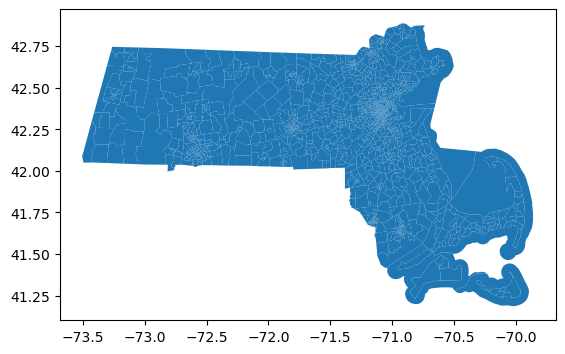

In [6]:
ma_ct_shp.plot()
plt.show()

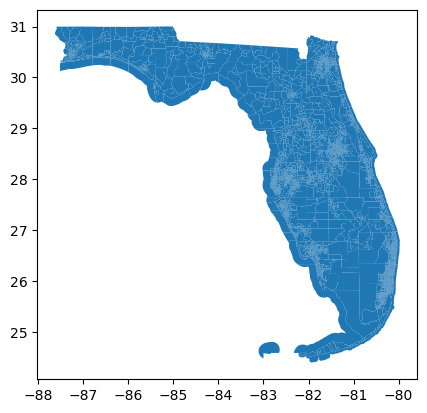

In [7]:
fl_ct_shp.plot()
plt.show()

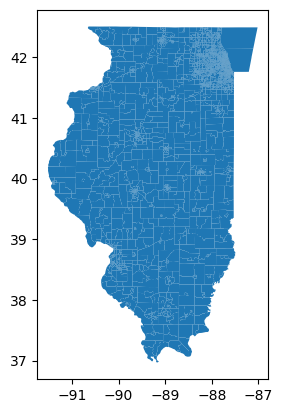

In [8]:
il_ct_shp.plot()
plt.show()

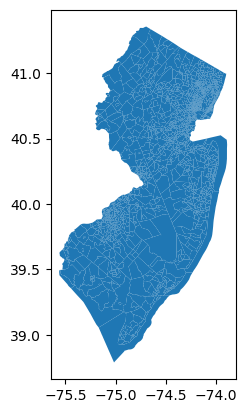

In [8]:
nj_ct_shp.plot()
plt.show()

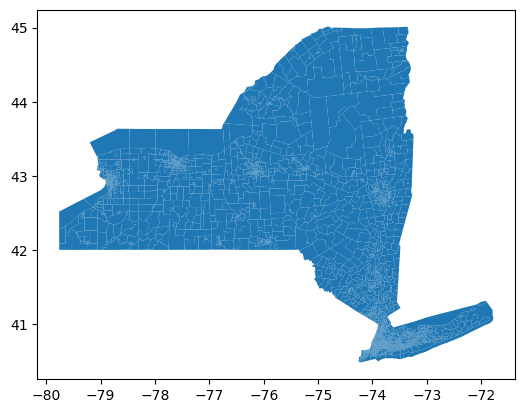

In [9]:
ny_ct_shp.plot()
plt.show()

# Editing CTs

In [10]:
socioecon_dic.keys()

dict_keys(['nyc_2016', 'nyc_2018', 'boston_2016', 'boston_2018', 'florida_2016', 'florida_2018', 'illinois_2016', 'illinois_2018'])

In [11]:
# GEOID from the mobility data
print("Boston...")
print("Number of census tracts in MA-NH shapefile is: ", ma_ct_shp.shape[0] + nh_ct_shp.shape[0])
geoid_of_interest_boston = set(np.unique(boston_stays_df.GEOID)).union(set(np.unique(boston_stays_df.GEOID_home))) 
print("Number of census tracts in Boston from the mobility data: ", len(geoid_of_interest_boston))

geoid_of_interest_boston = list(set(geoid_of_interest_boston).intersection(set(socioecon_dic['boston_2016'].index)))
print("Number of census tracts in Boston from the mobility AND the socioecon data: ", len(geoid_of_interest_boston)) # 992 CTs. 

print("Miami...")
print("Number of census tracts in FL shapefile is: ", fl_ct_shp.shape[0])
geoid_of_interest_miami = set(np.unique(miami_stays_df.GEOID)).union(set(np.unique(miami_stays_df.GEOID_home))) 
print("Number of census tracts in Miami from the mobility data: ", len(geoid_of_interest_miami))

geoid_of_interest_miami = list(set(geoid_of_interest_miami).intersection(set(socioecon_dic['florida_2016'].index)))
print("Number of census tracts in Miami from the mobility AND the socioecon data: ", len(geoid_of_interest_miami)) # 992 CTs. 

print("Chicago...")
print("Number of census tracts in IL shapefile is: ", il_ct_shp.shape[0])
geoid_of_interest_chicago = set(np.unique(chicago_stays_df.GEOID)).union(set(np.unique(chicago_stays_df.GEOID_home))) 
print("Number of census tracts in Chicago from the mobility data: ", len(geoid_of_interest_chicago))

geoid_of_interest_chicago = list(set(geoid_of_interest_chicago).intersection(set(socioecon_dic['illinois_2016'].index)))
print("Number of census tracts in Chicago from the mobility AND the socioecon data: ", len(geoid_of_interest_chicago)) # 992 CTs. 

print("NYC...")
print("Number of census tracts in NY-NJ shapefile is: ", ny_ct_shp.shape[0] + nj_ct_shp.shape[0])
geoid_of_interest_nyc = set(np.unique(nyc_stays_df.GEOID)).union(set(np.unique(nyc_stays_df.GEOID_home))) 
print("Number of census tracts in NYC from the mobility data: ", len(geoid_of_interest_nyc))

geoid_of_interest_nyc = list(set(geoid_of_interest_nyc).intersection(set(socioecon_dic['nyc_2016'].index)))
print("Number of census tracts in NYC from the mobility AND the socioecon data: ", len(geoid_of_interest_nyc)) # 992 CTs. 



Boston...
Number of census tracts in MA-NH shapefile is:  1773
Number of census tracts in Boston from the mobility data:  1002
Number of census tracts in Boston from the mobility AND the socioecon data:  992
Miami...
Number of census tracts in FL shapefile is:  5160
Number of census tracts in Miami from the mobility data:  1212
Number of census tracts in Miami from the mobility AND the socioecon data:  1200
Chicago...
Number of census tracts in IL shapefile is:  3265
Number of census tracts in Chicago from the mobility data:  2210
Number of census tracts in Chicago from the mobility AND the socioecon data:  2009
NYC...
Number of census tracts in NY-NJ shapefile is:  6928
Number of census tracts in NYC from the mobility data:  4679
Number of census tracts in NYC from the mobility AND the socioecon data:  4620


In [14]:
# create the targeting shapefiles
# boston
greater_boston_ct_shp = pd.concat([ma_ct_shp, nh_ct_shp], axis = 0)
greater_boston_ct_shp = greater_boston_ct_shp.loc[greater_boston_ct_shp['GEOID'].isin(geoid_of_interest_boston),:]
greater_boston_ct_shp = greater_boston_ct_shp.set_index('GEOID')

# miami
miami_ct_shp = fl_ct_shp.loc[fl_ct_shp['GEOID'].isin(geoid_of_interest_miami), :]
miami_ct_shp = miami_ct_shp.set_index("GEOID")

# chicago
chicago_ct_shp = il_ct_shp.loc[il_ct_shp['GEOID'].isin(geoid_of_interest_chicago), :]
chicago_ct_shp = chicago_ct_shp.set_index("GEOID")

# nyc
nyc_ct_shp = pd.concat([nj_ct_shp, ny_ct_shp], axis = 0)
nyc_ct_shp = nyc_ct_shp.loc[nyc_ct_shp['GEOID'].isin(geoid_of_interest_nyc),:]
nyc_ct_shp = nyc_ct_shp.set_index('GEOID')


In [15]:
# create a dictionary for the three shapefiles
shp_dic = {}
shp_dic['boston'] = greater_boston_ct_shp
shp_dic['miami'] = miami_ct_shp
shp_dic['chicago'] = chicago_ct_shp
shp_dic['nyc'] = nyc_ct_shp


In [17]:
# size
print(greater_boston_ct_shp.shape) # 992 relevant 
print(miami_ct_shp.shape) # 926 relevant 
print(chicago_ct_shp.shape) # 1922 relevant 
print(nyc_ct_shp.shape) # 

(992, 12)
(926, 12)
(1922, 12)
(4620, 12)


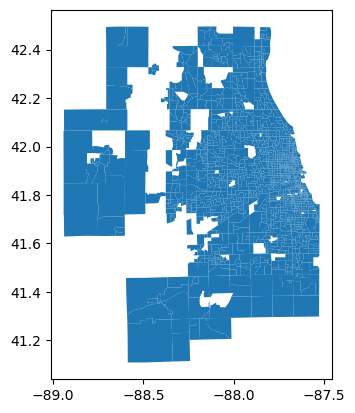

In [18]:
chicago_ct_shp.plot()
plt.show()

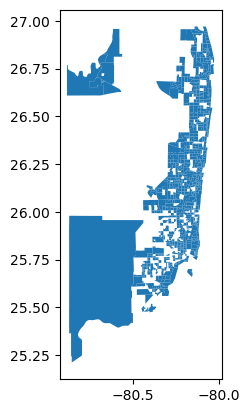

In [19]:
miami_ct_shp.plot()
plt.show()

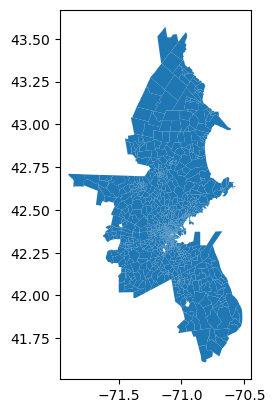

In [20]:
# Get the targeting geoids for the shapefile
greater_boston_ct_shp.plot()
plt.show()

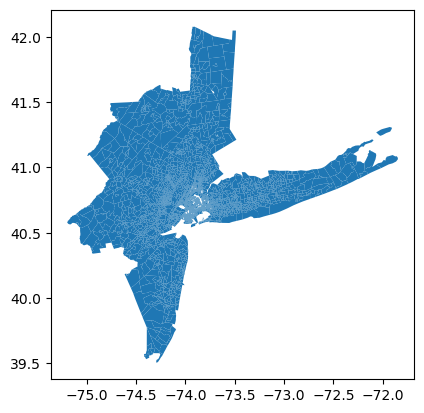

In [21]:
nyc_ct_shp.plot()
plt.show()

In [22]:
socioecon_dic['boston_2016']

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
full_ct_fips,,,,,,,,,,,,,,,,,,,,,
25001010100,2962.0,2962.0,1595.0,1367.0,57.0,1802.0,2962.0,2517.0,88.0,10.0,...,0.216945,0.127086,0.275722,0.133235,0.042191,0.451147,0.367721,0.525996,0.864595,0.600178
25001010206,3168.0,3168.0,1417.0,1751.0,58.3,1562.0,3168.0,2940.0,78.0,0.0,...,0.045455,0.137720,0.257198,0.218042,0.024568,0.499808,0.396359,0.465278,0.943662,0.652657
25001010208,1589.0,1589.0,827.0,762.0,57.9,820.0,1589.0,1563.0,11.0,9.0,...,0.007585,0.290771,0.276758,0.211774,0.017584,0.506116,0.394024,0.497797,0.964634,0.749924
25001010304,2107.0,2107.0,946.0,1161.0,61.0,1085.0,2107.0,2072.0,0.0,0.0,...,0.000000,0.087574,0.302654,0.164879,0.014116,0.481649,0.506941,0.401044,0.778802,0.600515
25001010306,2817.0,2817.0,1342.0,1475.0,56.4,1326.0,2817.0,2636.0,71.0,0.0,...,0.042130,0.069952,0.280639,0.156306,0.028419,0.465364,0.444972,0.446574,0.948718,0.599154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33019975600,3400.0,3400.0,1646.0,1754.0,48.9,1190.0,3400.0,3280.0,13.0,4.0,...,0.009919,0.064476,0.145180,0.054975,0.003871,0.204026,0.394001,0.474412,1.355462,0.228775
33019975700,5001.0,5001.0,2406.0,2595.0,45.7,2079.0,5001.0,4794.0,86.0,12.0,...,0.027409,0.023126,0.110240,0.016212,0.000000,0.126452,0.383535,0.466907,1.123136,0.088957
33019975800,5219.0,5219.0,2455.0,2764.0,38.6,2030.0,5219.0,5108.0,14.0,0.0,...,0.023659,0.029151,0.155026,0.040034,0.000000,0.195060,0.382737,0.453535,1.166010,0.079782


In [23]:
socioecon_dic.keys()

dict_keys(['nyc_2016', 'nyc_2018', 'boston_2016', 'boston_2018', 'florida_2016', 'florida_2018', 'illinois_2016', 'illinois_2018'])

In [24]:
growth_dic.keys()

dict_keys(['boston', 'illinois', 'florida', 'nyc'])

In [25]:
# process the socioecon and growth data files.
for key_ in socioecon_dic.keys():
    print(key_)
    if 'boston' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_boston)
    elif 'florida' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_miami)
    elif 'illinois' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_chicago)
    elif 'nyc' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_nyc)
        
    # get only the relevant geoids
    socioecon_dic[key_] = socioecon_dic[key_].loc[geoid_of_interest, :]
    socioecon_dic[key_].sort_index(inplace = True)    
    print(socioecon_dic[key_].shape)
    
for key_ in growth_dic.keys():
    print(key_)
    if 'boston' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_boston)
    elif 'florida' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_miami)
    elif 'illinois' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_chicago)
    elif 'nyc' in key_:
        geoid_of_interest = copy.copy(geoid_of_interest_nyc)

    # get only the relevant geoids
    growth_dic[key_] = growth_dic[key_].loc[geoid_of_interest, :]
    growth_dic[key_].sort_index(inplace = True)    
    print(growth_dic[key_].shape)
    

nyc_2016
(4620, 88)
nyc_2018
(4620, 88)
boston_2016
(992, 88)
boston_2018
(992, 88)
florida_2016
(1200, 88)
florida_2018
(1200, 88)
illinois_2016
(2009, 88)
illinois_2018
(2009, 88)
boston
(992, 3)
illinois
(2009, 3)
florida
(1200, 3)
nyc
(4620, 3)


In [26]:
# change the name to cities. 
socioecon_city_dic = {}
growth_city_dic = {}

socioecon_city_dic['boston_2016'] = socioecon_dic['boston_2016']
socioecon_city_dic['boston_2018'] = socioecon_dic['boston_2018']
socioecon_city_dic['miami_2016'] = socioecon_dic['florida_2016']
socioecon_city_dic['miami_2018'] = socioecon_dic['florida_2018']
socioecon_city_dic['chicago_2016'] = socioecon_dic['illinois_2016']
socioecon_city_dic['chicago_2018'] = socioecon_dic['illinois_2018']
socioecon_city_dic['nyc_2016'] = socioecon_dic['nyc_2016']
socioecon_city_dic['nyc_2018'] = socioecon_dic['nyc_2018']

growth_city_dic['boston'] = growth_dic['boston']
growth_city_dic['miami'] = growth_dic['florida']
growth_city_dic['chicago'] = growth_dic['illinois']
growth_city_dic['nyc'] = growth_dic['nyc']

In [27]:
socioecon_city_dic['chicago_2016']

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
full_ct_fips,,,,,,,,,,,,,,,,,,,,,
17031010100,4388.0,4388.0,1994.0,2394.0,34.8,2206.0,4388.0,2216.0,1716.0,0.0,...,0.049273,0.096931,0.195253,0.114241,0.027532,0.337025,0.245278,0.564266,1.122393,0.158978
17031010201,7032.0,7032.0,3505.0,3527.0,33.8,2722.0,7032.0,3108.0,3348.0,56.0,...,0.029392,0.058454,0.198835,0.099002,0.013103,0.310940,0.372591,0.430603,1.112417,0.106955
17031010202,2275.0,2275.0,1125.0,1150.0,36.3,991.0,2275.0,1097.0,735.0,10.0,...,0.004505,0.058559,0.242315,0.088005,0.024714,0.355033,0.375324,0.487912,1.120081,0.197571
17031010300,6205.0,6205.0,3061.0,3144.0,41.0,2910.0,6205.0,3876.0,1623.0,7.0,...,0.025371,0.058320,0.207917,0.105958,0.016793,0.330668,0.389651,0.489122,1.042955,0.117112
17031010400,5603.0,5603.0,2534.0,3069.0,24.9,1925.0,5603.0,3921.0,1076.0,0.0,...,0.156827,0.091513,0.366237,0.241416,0.025393,0.633047,0.374340,0.483669,1.407792,0.125795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197884005,1241.0,1241.0,640.0,601.0,50.7,531.0,1241.0,1193.0,0.0,11.0,...,0.000000,0.064583,0.109127,0.027778,0.000000,0.136905,0.433824,0.386785,0.903955,0.117940
17197884006,2194.0,2194.0,1224.0,970.0,44.6,827.0,2194.0,2100.0,30.0,0.0,...,0.000000,0.078947,0.081824,0.041224,0.000000,0.123048,0.337369,0.484959,1.286578,0.125793
17197884101,4332.0,4332.0,2133.0,2199.0,39.1,1398.0,4332.0,3126.0,479.0,9.0,...,0.108176,0.052201,0.200412,0.028866,0.008660,0.237938,0.526031,0.367036,1.137339,0.072329


In [28]:
# # get the targeting geoids dfs.
# greater_boston_socioecon_2016_v1_ct_df = greater_boston_socioecon_2016_ct_df.loc[geoid_of_interest, :]
# greater_boston_socioecon_2018_v1_ct_df = greater_boston_socioecon_2018_ct_df.loc[geoid_of_interest, :]
# growth_rate_ct_16_18_v1 = growth_rate_ct_16_18.loc[geoid_of_interest, :]

# # sort idx
# greater_boston_ct_shp.sort_index(inplace=True)
# greater_boston_socioecon_2016_v1_ct_df.sort_index(inplace=True)
# greater_boston_socioecon_2018_v1_ct_df.sort_index(inplace=True)
# growth_rate_ct_16_18_v1.sort_index(inplace=True)

# # Get the shapes 
# print(greater_boston_ct_shp.shape)
# print(greater_boston_socioecon_2016_v1_ct_df.shape)
# print(greater_boston_socioecon_2018_v1_ct_df.shape)
# print(growth_rate_ct_16_18_v1.shape)


In [29]:
# create the shapefiles with socioecon info
socioecon_city_shp_dic = {}

### boston processing
# merge 2018 and 2016 data
socioecon_city_shp_dic['boston'] = socioecon_city_dic['boston_2018'].merge(socioecon_city_dic['boston_2016'], 
                                                                           suffixes = ['_2018', '_2016'],
                                                                           left_index = True,
                                                                           right_index = True) 

# merge with the shapefile
socioecon_city_shp_dic['boston'] = shp_dic['boston'].merge(socioecon_city_shp_dic['boston'], 
                                                              left_index = True,
                                                              right_index = True) 

# merge with growth
socioecon_city_shp_dic['boston'] = socioecon_city_shp_dic['boston'].merge(growth_city_dic['boston'], 
                                                                          left_index = True,
                                                                          right_index = True) 

# add density variable
socioecon_city_shp_dic['boston']['pop_density_2018'] = socioecon_city_shp_dic['boston']['pop_total_2018']/socioecon_city_shp_dic['boston']['ALAND']  
socioecon_city_shp_dic['boston']['pop_density_2016'] = socioecon_city_shp_dic['boston']['pop_total_2016']/socioecon_city_shp_dic['boston']['ALAND']  


### chicago processing
# merge 2018 and 2016 data
socioecon_city_shp_dic['chicago'] = socioecon_city_dic['chicago_2018'].merge(socioecon_city_dic['chicago_2016'], 
                                                                           suffixes = ['_2018', '_2016'],
                                                                           left_index = True,
                                                                           right_index = True) 

# merge with the shapefile
socioecon_city_shp_dic['chicago'] = shp_dic['chicago'].merge(socioecon_city_shp_dic['chicago'], 
                                                              left_index = True,
                                                              right_index = True) 

# merge with growth
socioecon_city_shp_dic['chicago'] = socioecon_city_shp_dic['chicago'].merge(growth_city_dic['chicago'], 
                                                                          left_index = True,
                                                                          right_index = True) 

# add density variable
socioecon_city_shp_dic['chicago']['pop_density_2018'] = socioecon_city_shp_dic['chicago']['pop_total_2018']/socioecon_city_shp_dic['chicago']['ALAND']  
socioecon_city_shp_dic['chicago']['pop_density_2016'] = socioecon_city_shp_dic['chicago']['pop_total_2016']/socioecon_city_shp_dic['chicago']['ALAND']  

### miami processing
# merge 2018 and 2016 data
socioecon_city_shp_dic['miami'] = socioecon_city_dic['miami_2018'].merge(socioecon_city_dic['miami_2016'], 
                                                                           suffixes = ['_2018', '_2016'],
                                                                           left_index = True,
                                                                           right_index = True) 

# merge with the shapefile
socioecon_city_shp_dic['miami'] = shp_dic['miami'].merge(socioecon_city_shp_dic['miami'], 
                                                              left_index = True,
                                                              right_index = True) 

# merge with growth
socioecon_city_shp_dic['miami'] = socioecon_city_shp_dic['miami'].merge(growth_city_dic['miami'], 
                                                                          left_index = True,
                                                                          right_index = True) 

# add density variable
socioecon_city_shp_dic['miami']['pop_density_2018'] = socioecon_city_shp_dic['miami']['pop_total_2018']/socioecon_city_shp_dic['miami']['ALAND']  
socioecon_city_shp_dic['miami']['pop_density_2016'] = socioecon_city_shp_dic['miami']['pop_total_2016']/socioecon_city_shp_dic['miami']['ALAND']  


### nyc processing
# merge 2018 and 2016 data
socioecon_city_shp_dic['nyc'] = socioecon_city_dic['nyc_2018'].merge(socioecon_city_dic['nyc_2016'], 
                                                                           suffixes = ['_2018', '_2016'],
                                                                           left_index = True,
                                                                           right_index = True) 

# merge with the shapefile
socioecon_city_shp_dic['nyc'] = shp_dic['nyc'].merge(socioecon_city_shp_dic['nyc'], 
                                                              left_index = True,
                                                              right_index = True) 

# merge with growth
socioecon_city_shp_dic['nyc'] = socioecon_city_shp_dic['nyc'].merge(growth_city_dic['nyc'], 
                                                                          left_index = True,
                                                                          right_index = True) 

# add density variable
socioecon_city_shp_dic['nyc']['pop_density_2018'] = socioecon_city_shp_dic['nyc']['pop_total_2018']/socioecon_city_shp_dic['nyc']['ALAND']  
socioecon_city_shp_dic['nyc']['pop_density_2016'] = socioecon_city_shp_dic['nyc']['pop_total_2016']/socioecon_city_shp_dic['nyc']['ALAND']  


# check the shapes of the matrices
for key_ in socioecon_city_shp_dic.keys():
    print(socioecon_city_shp_dic[key_].shape)
    

(992, 193)
(1922, 193)
(926, 193)
(4620, 193)


In [25]:
# # Merge files.
# greater_boston_socioecon_ct_df = greater_boston_socioecon_2018_v1_ct_df.merge(greater_boston_socioecon_2016_v1_ct_df, 
#                                                                               suffixes = ['_2018', '_2016'],
#                                                                               left_index = True,
#                                                                               right_index = True)
# greater_boston_socioecon_ct_df

# # Add population density
# greater_boston_ct_socioecon_shp['pop_density_2018'] = greater_boston_ct_socioecon_shp['pop_total_2018']/greater_boston_ct_socioecon_shp['ALAND']
# greater_boston_ct_socioecon_shp['pop_density_2016'] = greater_boston_ct_socioecon_shp['pop_total_2016']/greater_boston_ct_socioecon_shp['ALAND']

# # Combine the files. 
# greater_boston_ct_socioecon_shp = greater_boston_ct_shp.merge(greater_boston_socioecon_ct_df, 
#                                                               left_index = True, 
#                                                               right_index = True)

# greater_boston_ct_socioecon_shp = greater_boston_ct_socioecon_shp.merge(growth_rate_ct_16_18_v1, 
#                                                                         left_index = True,
#                                                                         right_index = True)

# greater_boston_ct_socioecon_shp


In [26]:
# print the col
for col in socioecon_city_shp_dic['miami'].columns:
    print(col)

STATEFP
COUNTYFP
TRACTCE
NAME
NAMELSAD
MTFCC
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
geometry
pop_total_2018
sex_total_2018
sex_male_2018
sex_female_2018
age_median_2018
households_2018
race_total_2018
race_white_2018
race_black_2018
race_native_2018
race_asian_2018
inc_total_pop_2018
inc_no_pop_2018
inc_with_pop_2018
inc_pop_10k_2018
inc_pop_1k_15k_2018
inc_pop_15k_25k_2018
inc_pop_25k_35k_2018
inc_pop_35k_50k_2018
inc_pop_50k_65k_2018
inc_pop_65k_75k_2018
inc_pop_75k_2018
inc_median_ind_2018
travel_total_to_work_2018
travel_driving_to_work_2018
travel_pt_to_work_2018
travel_taxi_to_work_2018
travel_cycle_to_work_2018
travel_walk_to_work_2018
travel_work_from_home_2018
edu_total_pop_2018
bachelor_male_25_34_2018
master_phd_male_25_34_2018
bachelor_male_35_44_2018
master_phd_male_35_44_2018
bachelor_male_45_64_2018
master_phd_male_45_64_2018
bachelor_male_65_over_2018
master_phd_male_65_over_2018
bachelor_female_25_34_2018
master_phd_female_25_34_2018
bachelor_female_35_44_2018
master_

## Concat the four cities into 'total'

In [30]:
# # read and save the shp dic again
# with open('../../data/02_intermediate/socioecon_boston_miami_chicago_ct_shp_dic.pickle', 'rb') as f:
#     socioecon_city_shp_dic = pickle.load(f)
    
# with open('../../data/02_intermediate/boston_miami_chicago_ct_shp_dic.pickle', 'rb') as f:
#     shp_dic = pickle.load(f)
    

In [31]:
# concat the four cities' socioecon. 
socioecon_city_shp_total = pd.concat(socioecon_city_shp_dic, axis = 0)
socioecon_city_shp_total['city'] = [idx[0] for idx in socioecon_city_shp_total.index]
socioecon_city_shp_total.index = [idx[1] for idx in socioecon_city_shp_total.index]
socioecon_city_shp_dic['total'] = socioecon_city_shp_total # save

# concat the three cities' shapefiles. 
shp_total = pd.concat(shp_dic, axis = 0)
shp_total['city'] = [idx[0] for idx in shp_total.index]
shp_total.index = [idx[1] for idx in shp_total.index]
shp_dic['total'] = shp_total # save


## Please sort the indices!

In [33]:
# # sort the index
# with open('../../data/02_intermediate/socioecon_boston_miami_chicago_ct_shp_dic.pickle', 'rb') as f:
#     socioecon_city_shp_dic = pickle.load(f)

# with open('../../data/02_intermediate/boston_miami_chicago_ct_shp_dic.pickle', 'rb') as f:
#     shp_dic = pickle.load(f)


In [34]:
# sort the indices for the two dic
for key_ in socioecon_city_shp_dic.keys():
    socioecon_city_shp_dic[key_] = socioecon_city_shp_dic[key_].sort_index()

for key_ in shp_dic.keys():
    shp_dic[key_] = shp_dic[key_].sort_index()


In [35]:
shp_dic['nyc']

,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
GEOID,,,,,,,,,,,,
34003001000,34,003,001000,10,Census Tract 10,G5020,S,8021451,53624,+41.0326690,-074.1338262,"POLYGON ((-74.15544 41.02591, -74.15526 41.025..."
34003002100,34,003,002100,21,Census Tract 21,G5020,S,16578473,7309290,+40.9687824,-073.9168962,"POLYGON ((-73.94466 40.95763, -73.94428 40.958..."
34003002200,34,003,002200,22,Census Tract 22,G5020,S,5873393,24988,+41.0093368,-073.9419971,"POLYGON ((-73.96566 41.01165, -73.96564 41.011..."
34003002300,34,003,002300,23,Census Tract 23,G5020,S,7213197,22642,+40.9920464,-073.9505506,"POLYGON ((-73.97072 40.99497, -73.96995 40.999..."
34003003100,34,003,003100,31,Census Tract 31,G5020,S,1243260,0,+40.9304752,-073.9866374,"POLYGON ((-73.99353 40.92798, -73.99269 40.928..."
...,...,...,...,...,...,...,...,...,...,...,...,...
36119015000,36,119,015000,150,Census Tract 150,G5020,S,55235323,3933398,+41.3405273,-073.5976089,"POLYGON ((-73.67711 41.30343, -73.67693 41.304..."
36119981000,36,119,981000,9810,Census Tract 9810,G5020,S,4205408,0,+41.0842837,-073.8105049,"POLYGON ((-73.82881 41.08166, -73.82844 41.081..."
36119982000,36,119,982000,9820,Census Tract 9820,G5020,S,264916,0,+41.1513369,-073.8684937,"POLYGON ((-73.87180 41.15252, -73.87169 41.152..."


# Save

In [37]:
# save the shapefile dictionary and the socioecon shapefile dictionary
with open('../../data/02_intermediate/socioecon_boston_miami_chicago_nyc_ct_shp_dic.pickle', 'wb') as f:
    pickle.dump(socioecon_city_shp_dic, f)

with open('../../data/02_intermediate/boston_miami_chicago_nyc_ct_shp_dic.pickle', 'wb') as f:
    pickle.dump(shp_dic, f)
    